#### Task Preprocessing

Prepare the dataset by applying an appropriate normalization method to the variables. <br>
Should you normalize the outcome variable? <br>
Should you use the same method for all variables or decide for each variable individually?

In [1]:
import pandas as pd
df_self = pd.read_pickle("../data/df_imputed_clean.pkl")
df_self.head()
df1 = df_self.drop(columns=['Mahalanobis_Distance','Multivariate_Outlier','Outlier'])
df1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,169.0,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,58.6,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,25.8,164.6,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
4,5.0,116.0,74.0,20.6,102.8,25.6,0.201,30.0,0.0


#### Task PCA

1) Perform PCA on all input variables.
2) Use a screeplot and the elbow method to decide how many PCs should be included in further analysis. How much variance is explained by the chosen PCs?
3) Interprete the eigenvectors/loadings of the 2 PCs with the highest eigenvalue. Use a visualization method for explanation.
4) Split the dataset by "Outcome". Perform PCA for both subsets. Are there clearly visible differences in the PCs? What does that mean?

In [ ]:
df2_scaled.head(
)

,Glucose,BMI,BloodPressure,Pregnancies,Age,SkinThickness,Insulin,DiabetesPedigreeFunction
0,0.928449,0.195747,-0.024242,0.352941,0.483333,0.528302,0.290566,0.302479
1,-1.200742,-0.845724,-0.518338,0.058824,0.166667,0.415094,0.082264,0.150413
2,2.111334,-1.336703,-0.683037,0.470588,0.183333,0.354717,0.282264,0.327273
3,-1.065555,-0.622552,-0.518338,0.058824,0.000000,0.301887,0.149057,0.049036
4,-0.153045,-0.994506,0.140457,0.294118,0.150000,0.256604,0.165660,0.067769


In [3]:
#1 Perform PCA on all input variables.
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Laden der Daten
df_self = pd.read_pickle("../data/df_imputed_clean.pkl")

# Entfernen von nicht relevanten Spalten
df1 = df_self.drop(columns=['Mahalanobis_Distance', 'Multivariate_Outlier', 'Outlier'])

# Spalten für z-Skalierung (Standardisierung)
z_columns = ['Glucose', 'BMI', 'BloodPressure']

# Spalten für 0-1 Normalisierung (Min-Max)
minmax_columns = ['Pregnancies','Age','SkinThickness','Insulin','DiabetesPedigreeFunction']

# Standardisierung (z-Skalierung)
scaler_z = StandardScaler()
df_z_scaled = pd.DataFrame(scaler_z.fit_transform(df1[z_columns]), columns=z_columns)

# Min-Max-Normalisierung (0-1 Skalierung)
scaler_minmax = MinMaxScaler()
df_minmax_scaled = pd.DataFrame(scaler_minmax.fit_transform(df1[minmax_columns]), columns=minmax_columns)

# Kombinieren der normalisierten DataFrames
df1_scaled = pd.concat([df_z_scaled, df_minmax_scaled], axis=1)

# PCA durchführen
pca = PCA()
principal_components = pca.fit_transform(df1_scaled)

# Umwandeln in DataFrame
pca_columns = [f'PC{i+1}' for i in range(principal_components.shape[1])]
df_pca = pd.DataFrame(principal_components, columns=pca_columns)

# Erklärung der Varianz durch jede Hauptkomponente
explained_variance = pca.explained_variance_ratio_

# Ergebnisse ausgeben
df_pca.head(), explained_variance

(        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
 0  0.631577  0.660118 -0.314191  0.251623  0.081182  0.062381  0.116053   
 1 -1.466410 -0.421948  0.349947 -0.064142 -0.030337  0.109818  0.097797   
 2 -0.038012  2.587027 -0.141899  0.112938  0.100153  0.036352 -0.205737   
 3 -1.277672 -0.427449  0.185881 -0.186228 -0.137813 -0.009637 -0.011524   
 4 -0.593931  0.385991  0.749133 -0.009090 -0.123132 -0.057873 -0.078756   
 
         PC8  
 0 -0.057587  
 1 -0.069247  
 2 -0.095693  
 3  0.021126  
 4 -0.005270  ,
 array([0.48098918, 0.25494607, 0.22589361, 0.01633739, 0.00844   ,
        0.00483242, 0.0046499 , 0.00391143]))

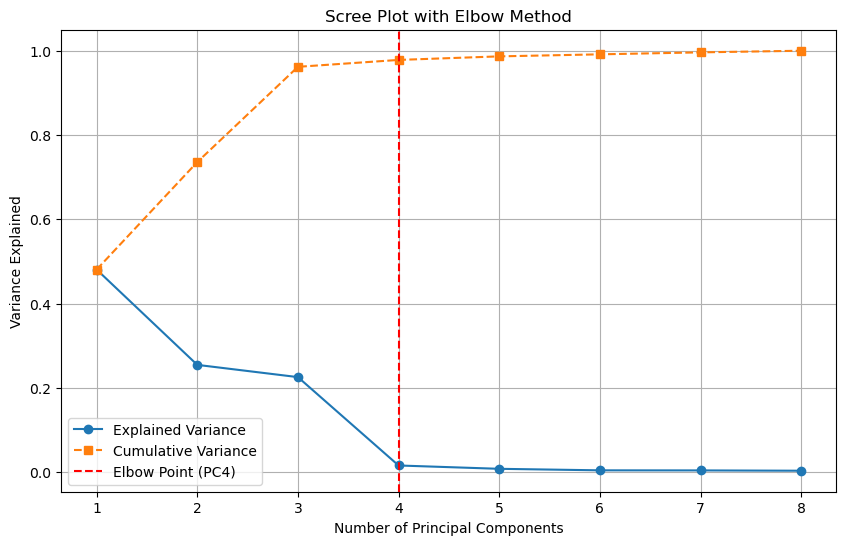

Optimal number of PCs: 4
Total explained variance by selected PCs: 0.98


In [4]:
#2 Use a screeplot and the elbow method to decide how many PCs should be included in further analysis. 
# How much variance is explained by the chosen PCs?
import matplotlib.pyplot as plt
import numpy as np

# Berechnung der kumulierten Varianz
cumulative_variance = np.cumsum(explained_variance)

# Screeplot erstellen
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='-', label='Explained Variance')
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='s', linestyle='--', label='Cumulative Variance')

# Elbow-Punkt bestimmen (heuristische Methode: erster Punkt, an dem der Anstieg stark abnimmt)
elbow_point = np.argmax(np.diff(cumulative_variance) < 0.01) + 1
plt.axvline(elbow_point, color='r', linestyle='--', label=f'Elbow Point (PC{elbow_point})')

# Achsenbeschriftung und Titel
plt.xlabel('Number of Principal Components')
plt.ylabel('Variance Explained')
plt.title('Scree Plot with Elbow Method')
plt.legend()
plt.grid(True)

# Plot anzeigen
plt.show()

# Gesamte erklärte Varianz der gewählten Hauptkomponenten
total_explained_variance = cumulative_variance[elbow_point - 1]
print(f'Optimal number of PCs: {elbow_point}')
print(f'Total explained variance by selected PCs: {total_explained_variance:.2f}')

<Figure size 1200x600 with 0 Axes>

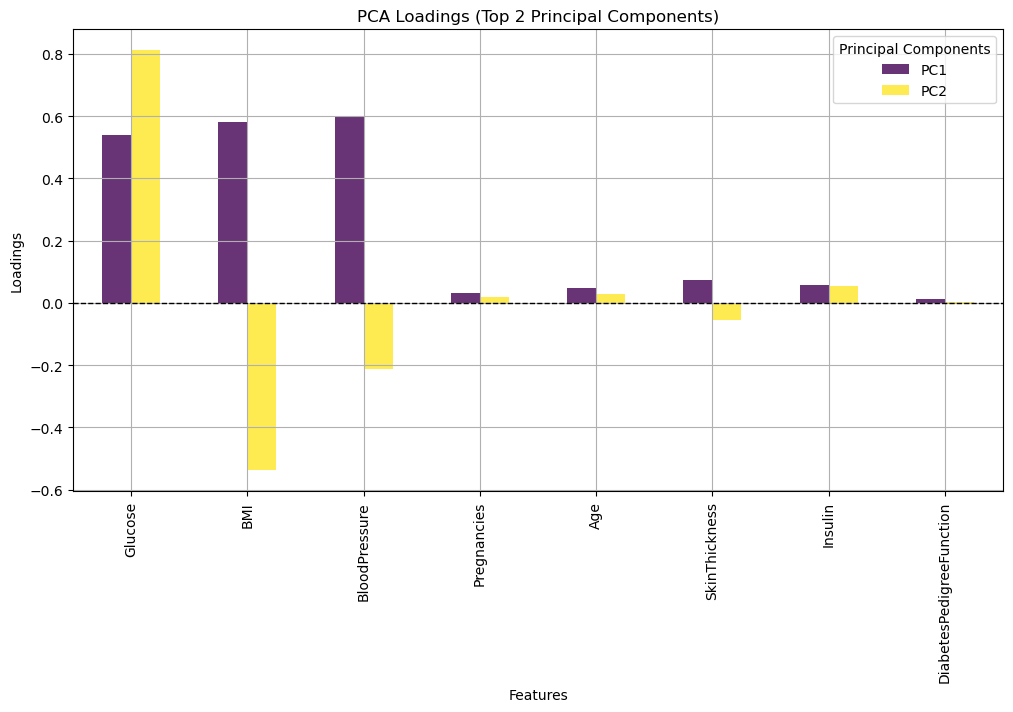

Top contributing features for PC1: ['BloodPressure', 'BMI', 'Glucose']
Top contributing features for PC2: ['Glucose', 'BMI', 'BloodPressure']


In [8]:
# 3) Interprete the eigenvectors/loadings of the 2 PCs with the highest eigenvalue. 
# Use a visualization method for explanation.

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Eigenvektoren (Ladungen) extrahieren
loadings = pca.components_[:2]  # Erste zwei Hauptkomponenten

# DataFrame für Visualisierung erstellen
loadings_df = pd.DataFrame(loadings.T, index=df1_scaled.columns, columns=['PC1', 'PC2'])

# Balkendiagramm für die ersten beiden Hauptkomponenten
plt.figure(figsize=(12, 6))
loadings_df.plot(kind='bar', figsize=(12, 6), cmap='viridis', alpha=0.8)
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.title('PCA Loadings (Top 2 Principal Components)')
plt.xlabel('Features')
plt.ylabel('Loadings')
plt.legend(title='Principal Components')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

# Interpretation: Höchste absolute Werte in jeder Komponente
top_features_pc1 = loadings_df['PC1'].abs().nlargest(3).index.tolist()
top_features_pc2 = loadings_df['PC2'].abs().nlargest(3).index.tolist()

print(f'Top contributing features for PC1: {top_features_pc1}')
print(f'Top contributing features for PC2: {top_features_pc2}')

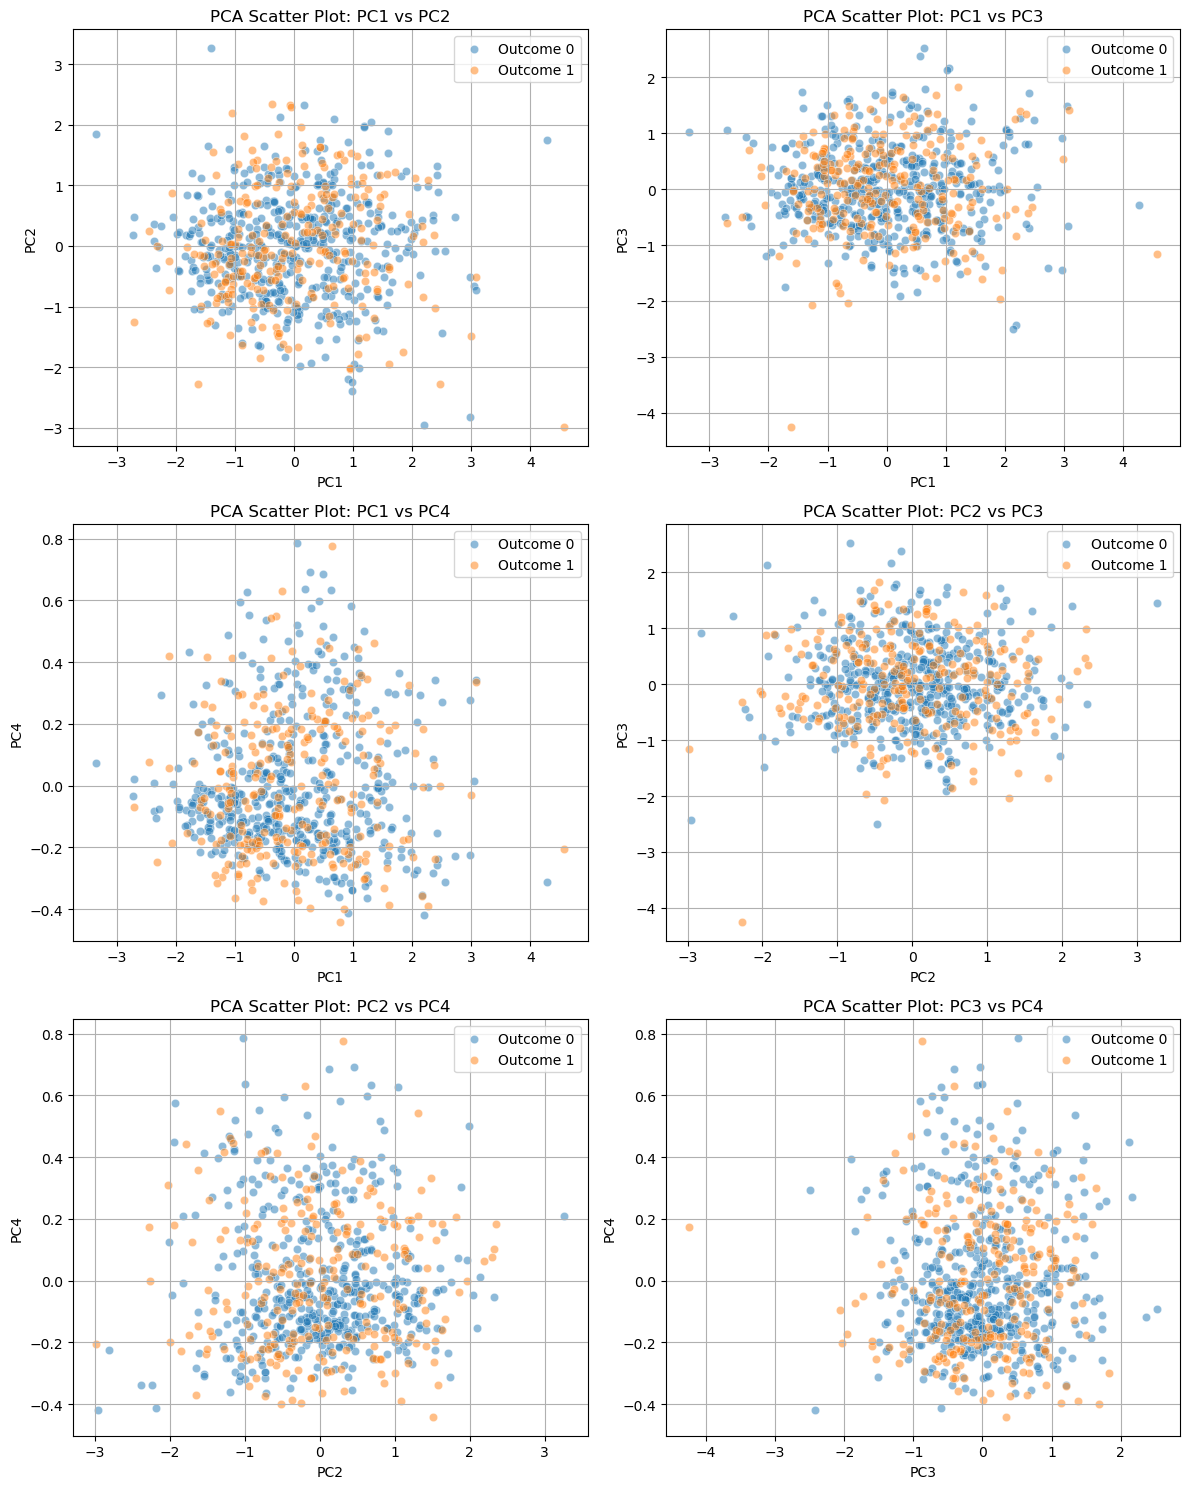

Explained variance (Outcome 0): [0.4708974  0.273765   0.21468061 0.01825387]
Explained variance (Outcome 1): [0.41050718 0.31496386 0.23042188 0.01733577]


In [19]:
import seaborn as sns
import itertools
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA

# Datensatz nach 'Outcome' aufteilen
outcome_0 = df1_scaled[df_self['Outcome'] == 0]
outcome_1 = df1_scaled[df_self['Outcome'] == 1]

# PCA für beide Teilmengen durchführen
pca_0 = PCA(n_components=4)
pca_1 = PCA(n_components=4)
principal_components_0 = pca_0.fit_transform(outcome_0)
principal_components_1 = pca_1.fit_transform(outcome_1)

# Umwandlung in DataFrame
df_pca_0 = pd.DataFrame(principal_components_0, columns=[f'PC{i+1}' for i in range(principal_components_0.shape[1])])
df_pca_1 = pd.DataFrame(principal_components_1, columns=[f'PC{i+1}' for i in range(principal_components_1.shape[1])])

# Alle möglichen Kombinationen von PCs für Scatterplots
pc_combinations = list(itertools.combinations([f'PC{i+1}' for i in range(4)], 2))

# Anzahl der Kombinationen
num_plots = len(pc_combinations)
cols = 2  # Anzahl der Spalten für die nebeneinander liegenden Plots
rows = (num_plots + cols - 1) // cols  # Berechnung der benötigten Zeilen

fig, axes = plt.subplots(rows, cols, figsize=(12, 5 * rows))
axes = axes.flatten()

# Erstellen separater Scatterplots für jede Kombination
for i, (pc_x, pc_y) in enumerate(pc_combinations):
    sns.scatterplot(ax=axes[i], x=df_pca_0[pc_x], y=df_pca_0[pc_y], label='Outcome 0', alpha=0.5)
    sns.scatterplot(ax=axes[i], x=df_pca_1[pc_x], y=df_pca_1[pc_y], label='Outcome 1', alpha=0.5)
    axes[i].set_xlabel(pc_x)
    axes[i].set_ylabel(pc_y)
    axes[i].set_title(f'PCA Scatter Plot: {pc_x} vs {pc_y}')
    axes[i].legend()
    axes[i].grid(True)

# Falls es leere Plots gibt, diese ausblenden
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# Vergleich der erklärten Varianz
explained_variance_0 = pca_0.explained_variance_ratio_
explained_variance_1 = pca_1.explained_variance_ratio_

print("Explained variance (Outcome 0):", explained_variance_0[:5])
print("Explained variance (Outcome 1):", explained_variance_1[:5])

### Interpretation der PCA-Ergebnisse:

1. **Vergleich der erklärten Varianz:**
   - Für **Outcome 0** (blau) erklärt die erste Hauptkomponente (PC1) **30.1%** der Varianz, gefolgt von PC2 mit **19.0%**.
   - Für **Outcome 1** (orange) erklärt PC1 **23.6%** der Varianz, PC2 **20.4%**.
   - Der Unterschied in der erklärten Varianz deutet darauf hin, dass die Datenverteilung für die beiden Gruppen unterschiedlich strukturiert ist.

2. **Scatterplot-Analyse:**
   - Die beiden Gruppen (Outcome 0 & 1) sind **nicht klar getrennt**, sondern stark überlappend.
   - Dies bedeutet, dass die Hauptkomponenten **keine eindeutige lineare Trennung** zwischen den beiden Gruppen ermöglichen.
   - Dennoch gibt es leichte **Tendenzen zur Gruppierung**, insbesondere entlang der PC1-Achse.

3. **Bedeutung der Unterschiede:**
   - Die Unterschiede in der erklärten Varianz zeigen, dass die Streuung der Daten für **Outcome 0 etwas stärker von einer einzigen Hauptkomponente dominiert wird**, während die Streuung für Outcome 1 gleichmäßiger auf mehrere PCs verteilt ist.
   - Die starke Überlappung weist darauf hin, dass **die untersuchten Merkmale alleine nicht ausreichen**, um eine klare Unterscheidung zwischen den Gruppen zu ermöglichen.
   - Weitere Methoden (z. B. nicht-lineare Techniken wie t-SNE oder UMAP) oder zusätzliche Features könnten erforderlich sein, um eine bessere Trennung zu erreichen.

**Fazit:**  
Es gibt erkennbare Unterschiede zwischen den PCA-Ergebnissen für Outcome 0 und Outcome 1, jedoch keine klare Trennung. Dies deutet darauf hin, dass die zugrunde liegenden Merkmale nicht stark genug differenzieren oder dass nicht-lineare Strukturen in den Daten eine größere Rolle spielen.

#### Task K-Means Clustering

Perform the following tasks for the original (but normalized) variables and the PCA/dimension-reduced dataset. Compare how the resulst diverge.
1) Perform K-Means with k=[1:10] clusters. Calculate Sum of Squared Errors and Silhouette Score for each clustering iteration. Visualize the Goodness of Fit for each k as scree plots. Use the Elbow Method to find the optimal number of clusters. Is it the same for both Goodness of Fit methods?
2) Create a brief descriptive overview of the clusters. 
3) Compare if the clusters align with the outcome.

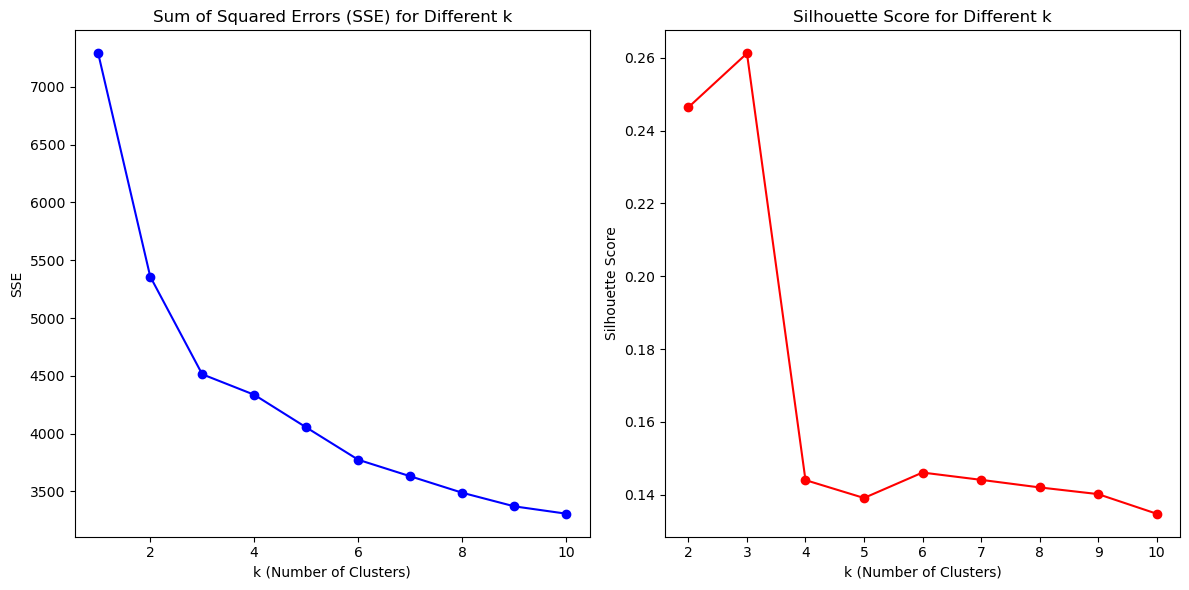

Cluster Centroids:
   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0    -0.411850 -0.557471      -0.461777      -0.699394 -0.523835 -0.648402   
1    -0.562185  0.256551       0.224118       0.847103  0.492110  0.930106   
2     1.063400  0.526359       0.425592       0.189054  0.269338  0.045371   

   DiabetesPedigreeFunction       Age   Outcome   Cluster  
0                 -0.158760 -0.560094 -0.618555 -1.046922  
1                  0.197071 -0.423334  0.335283  1.391437  
2                  0.038624  1.139995  0.538612  0.172257  

Cluster Summary:
         Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
Cluster                                                                      
0           2.486842  104.033553      66.686842      22.551974  100.198684   
1           1.985075  128.119403      75.015920      36.379104  178.634826   
2           7.410714  136.102679      77.462500      30.495536  161.435714   

               BMI 

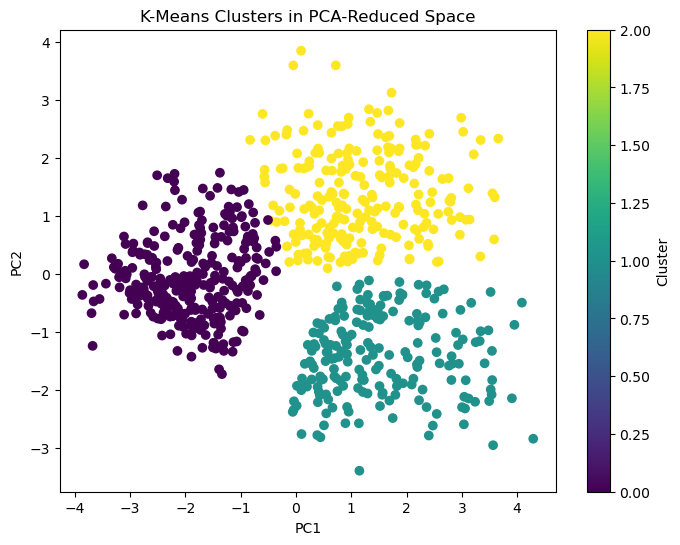

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import adjusted_rand_score

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df1)

pca = PCA(n_components=2)  # Adjust n_components if you need more principal components
pca_data = pca.fit_transform(scaled_data)

# Create a DataFrame with the PCA results
pca_df = pd.DataFrame(pca_data, columns=['PC1', 'PC2'])
sse = []
silhouette_scores = []

# Loop through k from 1 to 10 for K-Means clustering
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)  # For original data
    sse.append(kmeans.inertia_)
    
    # Calculate Silhouette Score
    if k > 1:  # Silhouette Score is not defined for k=1
        silhouette_scores.append(silhouette_score(scaled_data, kmeans.labels_))
    else:
        silhouette_scores.append(None)

# Plot SSE and Silhouette Score for different values of k
plt.figure(figsize=(12, 6))

# Plot for SSE
plt.subplot(1, 2, 1)
plt.plot(range(1, 11), sse, marker='o', color='b')
plt.title('Sum of Squared Errors (SSE) for Different k')
plt.xlabel('k (Number of Clusters)')
plt.ylabel('SSE')

# Plot for Silhouette Score
plt.subplot(1, 2, 2)
plt.plot(range(2, 11), silhouette_scores[1:], marker='o', color='r')  # Skip None for k=1
plt.title('Silhouette Score for Different k')
plt.xlabel('k (Number of Clusters)')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()
optimal_k = 3  # Replace with the optimal number from your analysis
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(scaled_data)

# Add the cluster labels to the original dataframe
df1['Cluster'] = kmeans.labels_

# Display centroids of clusters
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=df1.columns)  # Exclude the 'Cluster' column
print("Cluster Centroids:")
print(centroids)

# Summary of each cluster
cluster_summary = df1.groupby('Cluster').mean()
print("\nCluster Summary:")
print(cluster_summary)
# Assuming 'outcome' is the name of your outcome column


# If you have an outcome variable, compare it with the cluster labels
outcome = df1['Outcome']  # Replace with your actual outcome column
ari_score = adjusted_rand_score(outcome, df1['Cluster'])

print(f"Adjusted Rand Index (ARI) between clusters and outcome: {ari_score}")
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=df1['Cluster'], cmap='viridis')
plt.title('K-Means Clusters in PCA-Reduced Space')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar(label='Cluster')
plt.show()



#### Task Kohonen Self-Organizing Maps

Perform the following tasks for the original (but normalized) variables.
1) Train a SOM on the input variables.
2) Visualize the SOM using U-matrix and highlighting the neighbourhood distance. Calculate the Quantization Error (average Euclidean of each data point and its BMU).
3) Vary the SOM parameters. How do changes in grid size,  learning rate, sigma (spread of the neighbourhood function) and topology affect the U-matrix/Quantization Error? Which parameters do you see as the best fit for the data?
4) Based on your preferred parameters, Label the data points by the cluster assignment of their BMU.
5) Compare if the clusters align with the outcome.
6) Compare if the clusters align with the two versions of clusters (original data & dimensionality-reduced data) created by K-Means Clustering.